In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
train.shape

(54808, 14)

In [6]:
test.shape

(23490, 13)

In [7]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
train['department'].value_counts()

department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64

In [9]:
train['region'].value_counts()

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64

### Descriptive statistics


In [10]:
train.describe() # -> left / leave / Rare working in the same company -> 37 ( Outliers )

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [11]:
train.describe(include = 'object') 

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


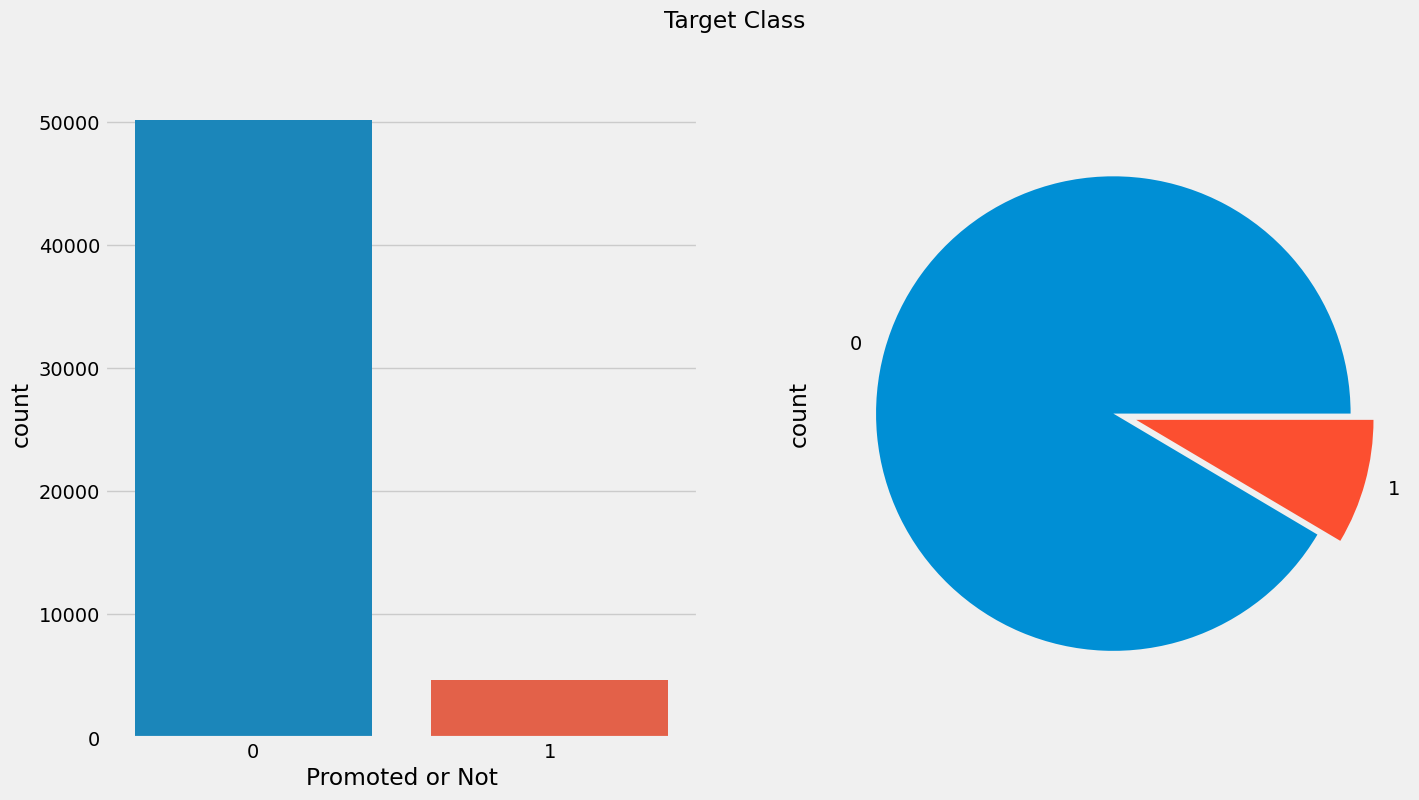

In [14]:
# Plotting -> Traget -> 0 and 1

# Count plot -> pie Chart

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(data=train, x='is_promoted')
plt.xlabel("Promoted or Not")

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], labels = ['0', '1'])
plt.suptitle("Target Class")
plt.show()

In [15]:
# Missing values imputation

train_total = train.isnull().sum()

train_precent = ((train.isnull().sum() / train.shape[0])*100).round(2)
train_precent

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64

In [16]:
test_total = test.isnull().sum()

test_precent = ((test.isnull().sum() / test.shape[0])*100).round(2)
test_precent

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.71
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
dtype: float64

In [17]:
train.head() # -> 1,2,3,4,5 ->mode()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [18]:
train['education'] = train['education'].fillna(train['education'].mode()[0])

train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

In [19]:
train_total = train.isnull().sum()

train_precent = ((train.isnull().sum() / train.shape[0])*100).round(2)
train_precent

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [21]:
test['education'] = test['education'].fillna(test['education'].mode()[0])

test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])

In [22]:
test_total = test.isnull().sum()

test_precent = ((test.isnull().sum() / test.shape[0])*100).round(2)
test_precent

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
dtype: float64

In [23]:
# Outliers Handling -> numerical Data

train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


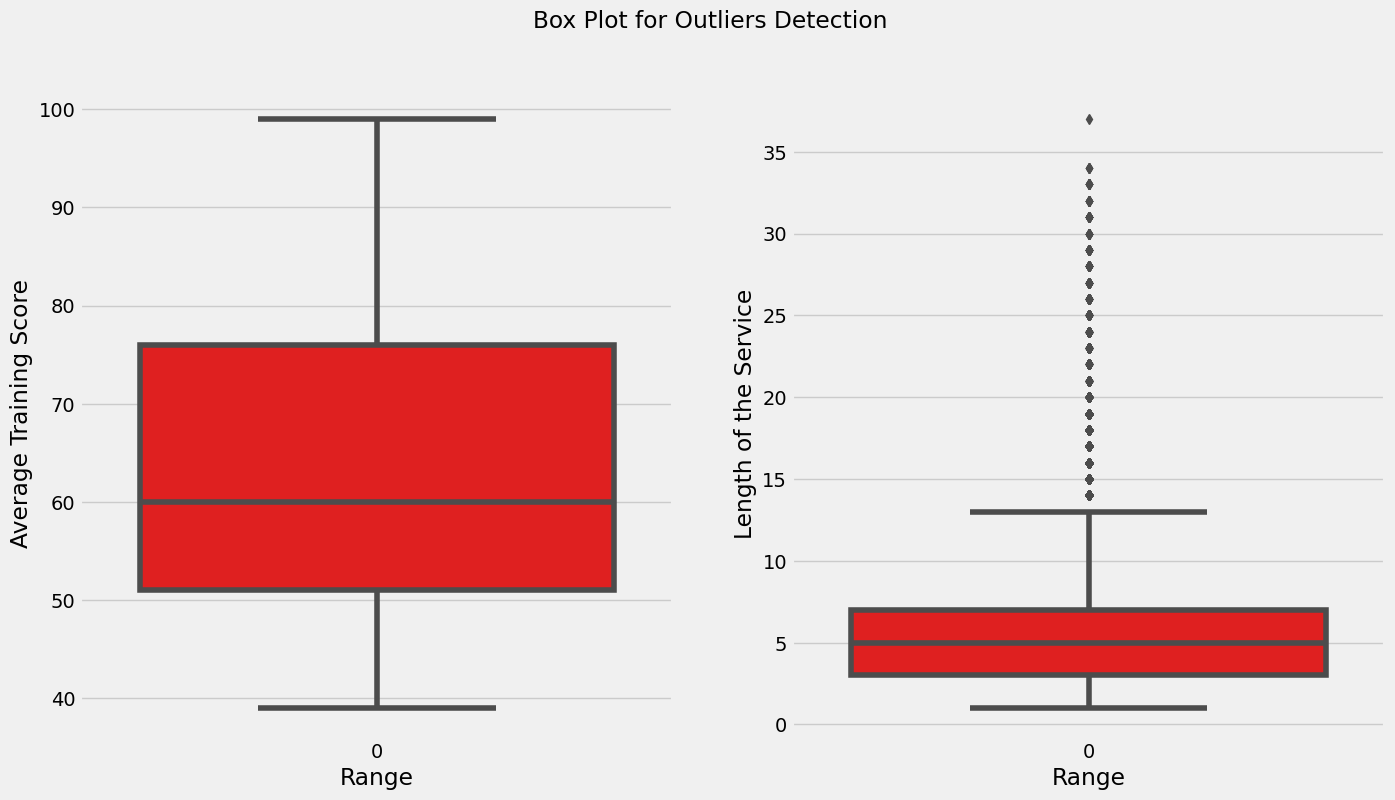

In [26]:
plt.subplot(1,2,1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.ylabel("Average Training Score")
plt.xlabel("Range")


plt.subplot(1,2,2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.ylabel("Length of the Service")
plt.xlabel("Range")
plt.suptitle("Box Plot for Outliers Detection")
plt.show()

In [27]:
train.shape

(54808, 14)

In [28]:
# Remove the outliers from the leanght of the serive columns

train = train[train['length_of_service'] < 13]

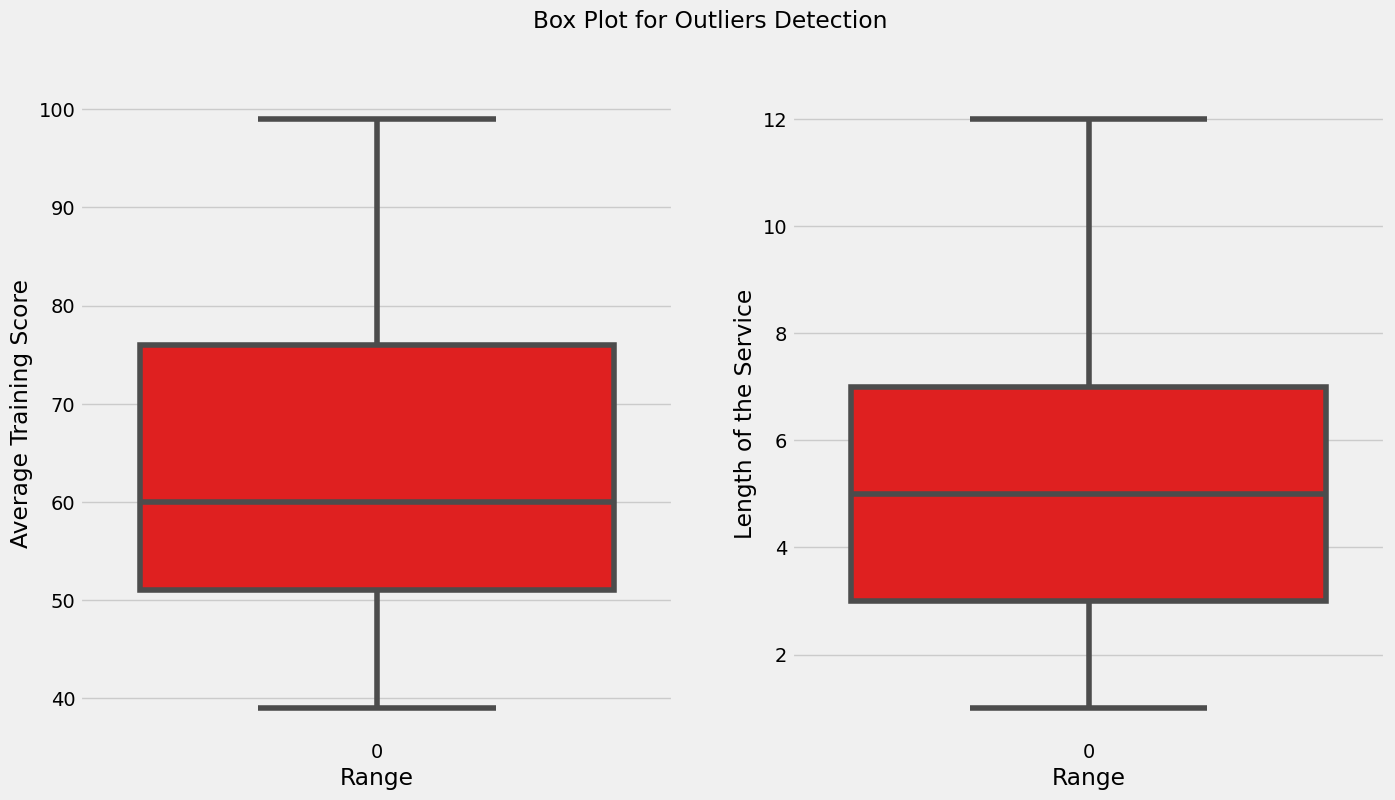

In [30]:
plt.subplot(1,2,1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.ylabel("Average Training Score")
plt.xlabel("Range")


plt.subplot(1,2,2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.ylabel("Length of the Service")
plt.xlabel("Range")
plt.suptitle("Box Plot for Outliers Detection")
plt.show()

### Univariate Analysis


### Bivariate Analysis


### Mutivariate Analysis


### Feature Engineering


### Model Building and Prediction


In [31]:
train.shape

(50632, 14)

In [32]:
train.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


Text(0.5, 1.0, 'awards_won?')

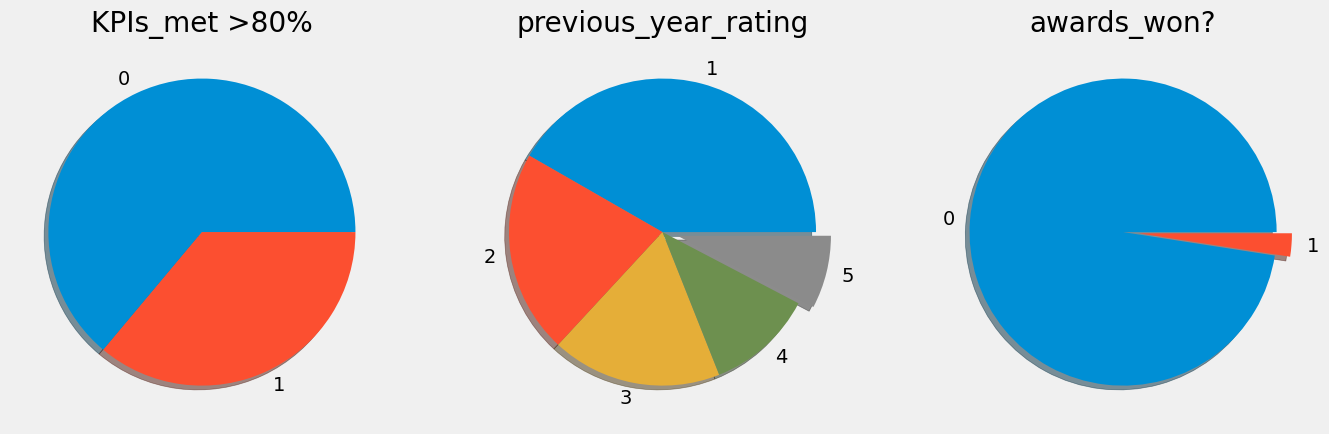

In [33]:
# awards_won , KPIs_met >80 , previous_year_rating -> Pic chart

# first columns: KPIs_met >80 
plt.subplot(1, 3, 1)
labels = ['0', '1']
explode = [0,0]
size = train['KPIs_met >80%'].value_counts()
plt.pie(size,labels = labels, explode = explode ,shadow = True )
plt.title("KPIs_met >80%")

# Second Columns: previous_year_rating

plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
explode = [0,0,0,0,0.1]
size = train['previous_year_rating'].value_counts()
plt.pie(size,labels = labels, explode = explode ,shadow = True )
plt.title("previous_year_rating")

# Thirs Columns: awards_won
plt.subplot(1, 3, 3)
labels = ['0', '1']
explode = [0,0.1]
size = train['awards_won?'].value_counts()
plt.pie(size,labels = labels, explode = explode ,shadow = True )
plt.title("awards_won?")

C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


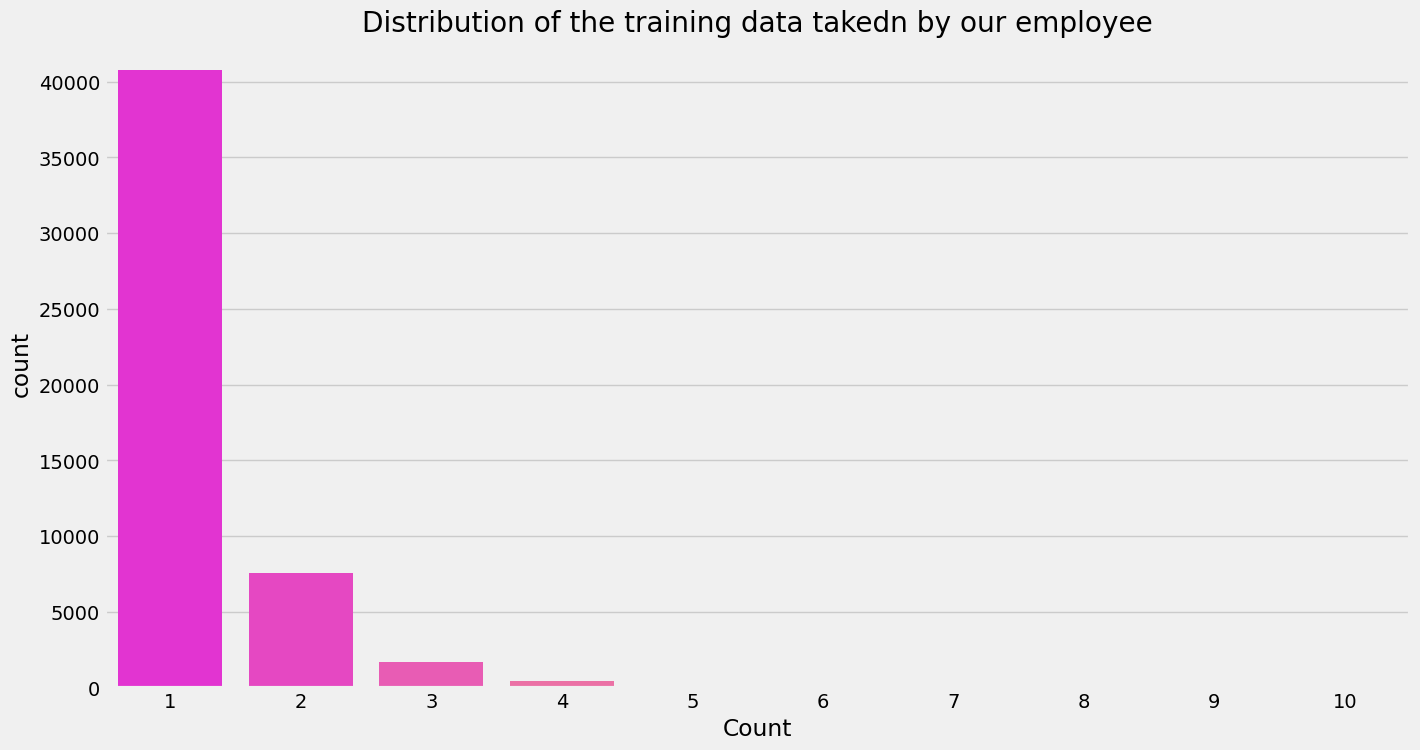

In [35]:
sns.countplot(data=train, x='no_of_trainings', palette = 'spring')
plt.xlabel("Count")
plt.title("Distribution of the training data takedn by our employee")
plt.show()

In [36]:
train['no_of_trainings'].value_counts()

no_of_trainings
1     40744
2      7556
3      1696
4       450
5       122
6        39
7        11
8         5
9         5
10        4
Name: count, dtype: int64

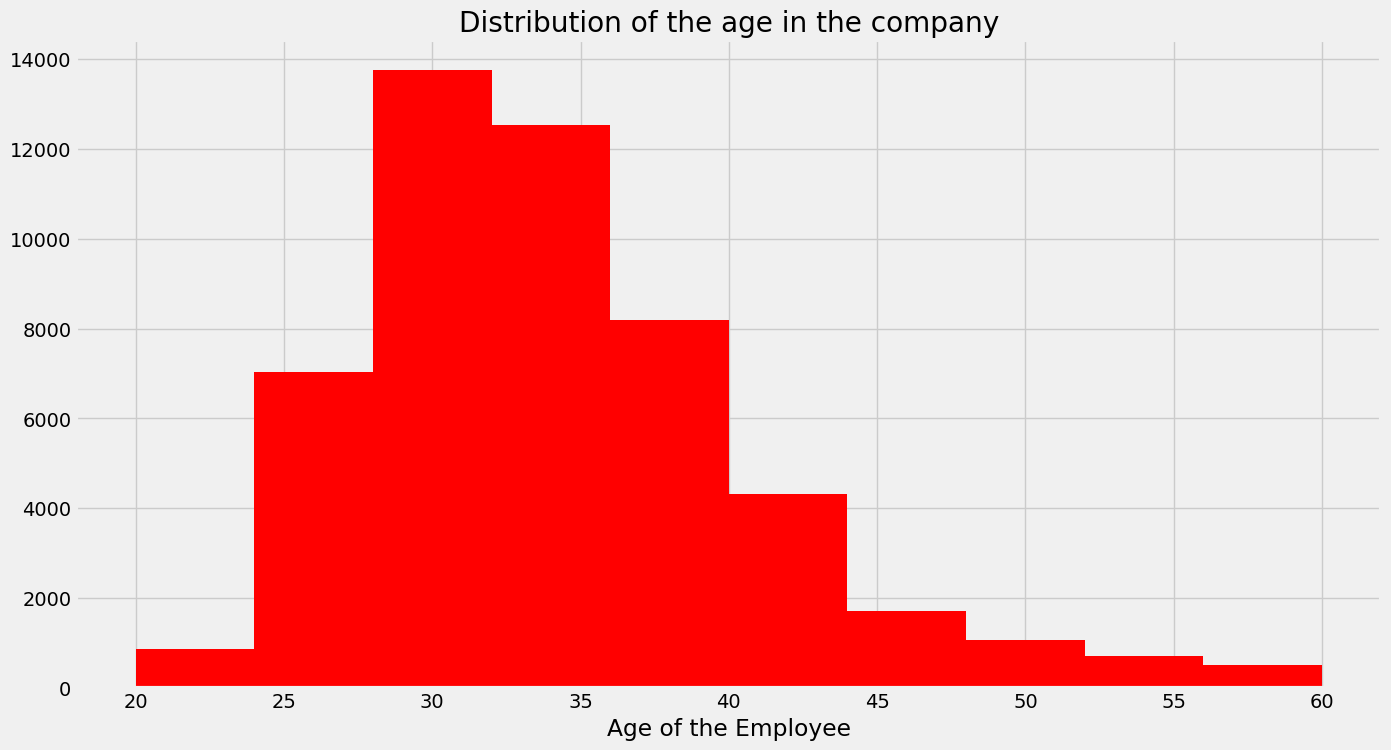

In [37]:
plt.hist(train['age'], color = 'red')
plt.title("Distribution of the age in the company")
plt.xlabel("Age of the Employee")
plt.show()

In [38]:
train.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


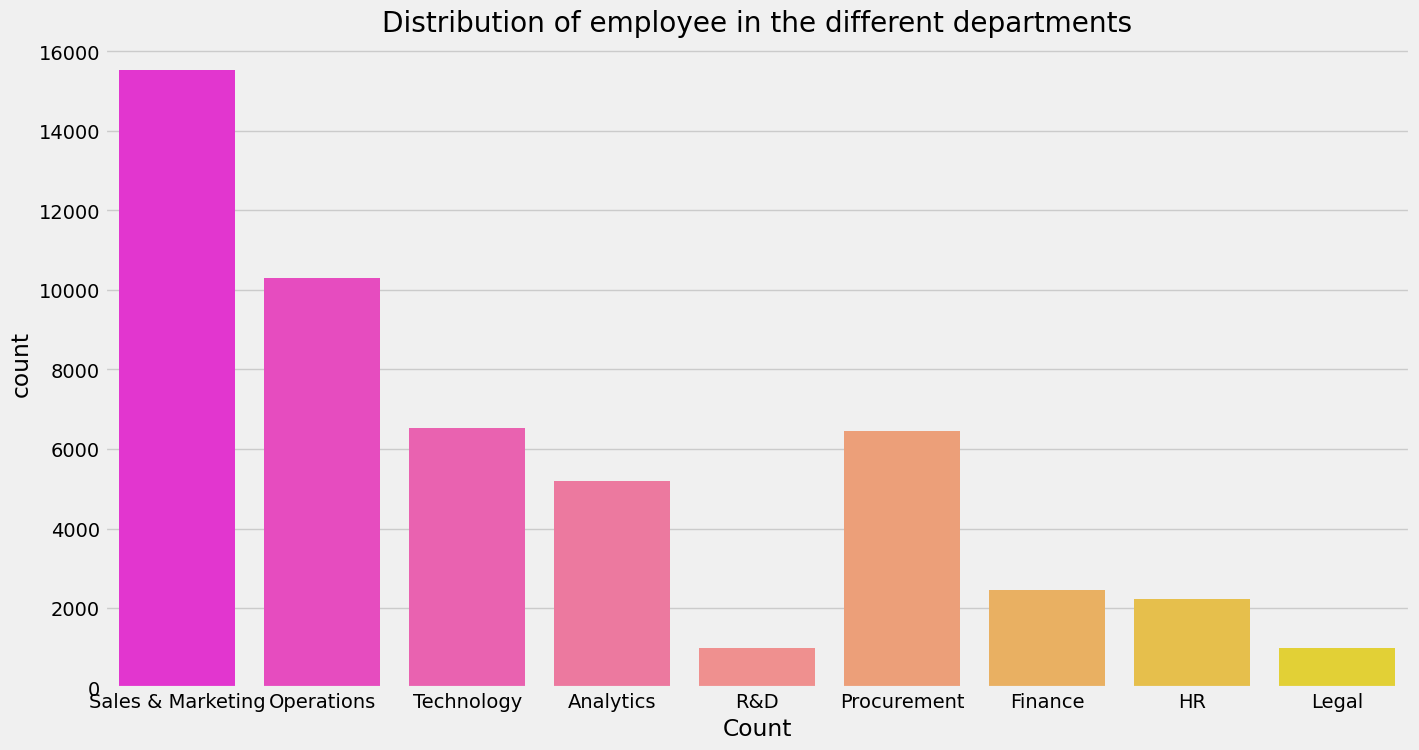

In [40]:
sns.countplot(data=train, x='department', palette = 'spring')
plt.xlabel("Count")
plt.title("Distribution of employee in the different departments")
plt.show()

In [41]:
train.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


Text(0.5, 1.0, 'recruitment_channel')

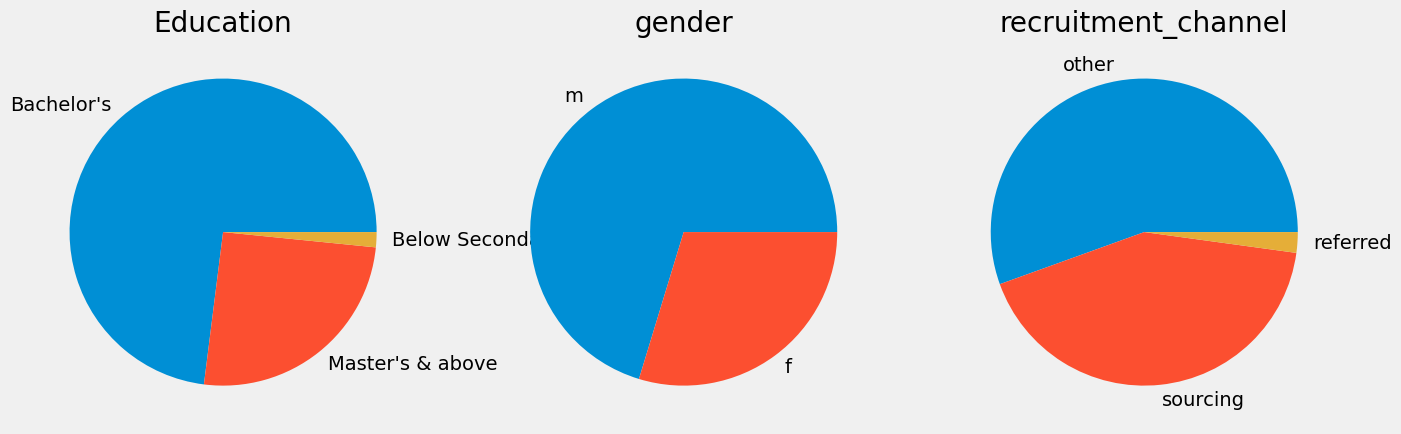

In [42]:
# education	gender	recruitment_channel

# Education
plt.subplot(1, 3, 1)
labels = train['education'].value_counts().index
size = train['education'].value_counts()
explode = None

plt.pie(size, labels = labels, explode = explode)
plt.title("Education")

#gender
plt.subplot(1, 3, 2)
labels = train['gender'].value_counts().index
size = train['gender'].value_counts()
explode = None
plt.pie(size, labels = labels, explode = explode)
plt.title("gender")

plt.subplot(1, 3, 3)
labels = train['recruitment_channel'].value_counts().index
size = train['recruitment_channel'].value_counts()
explode = None
plt.pie(size, labels = labels, explode = explode)
plt.title("recruitment_channel")

Bivariate Analysis
- C & C
- C & N
- N & N

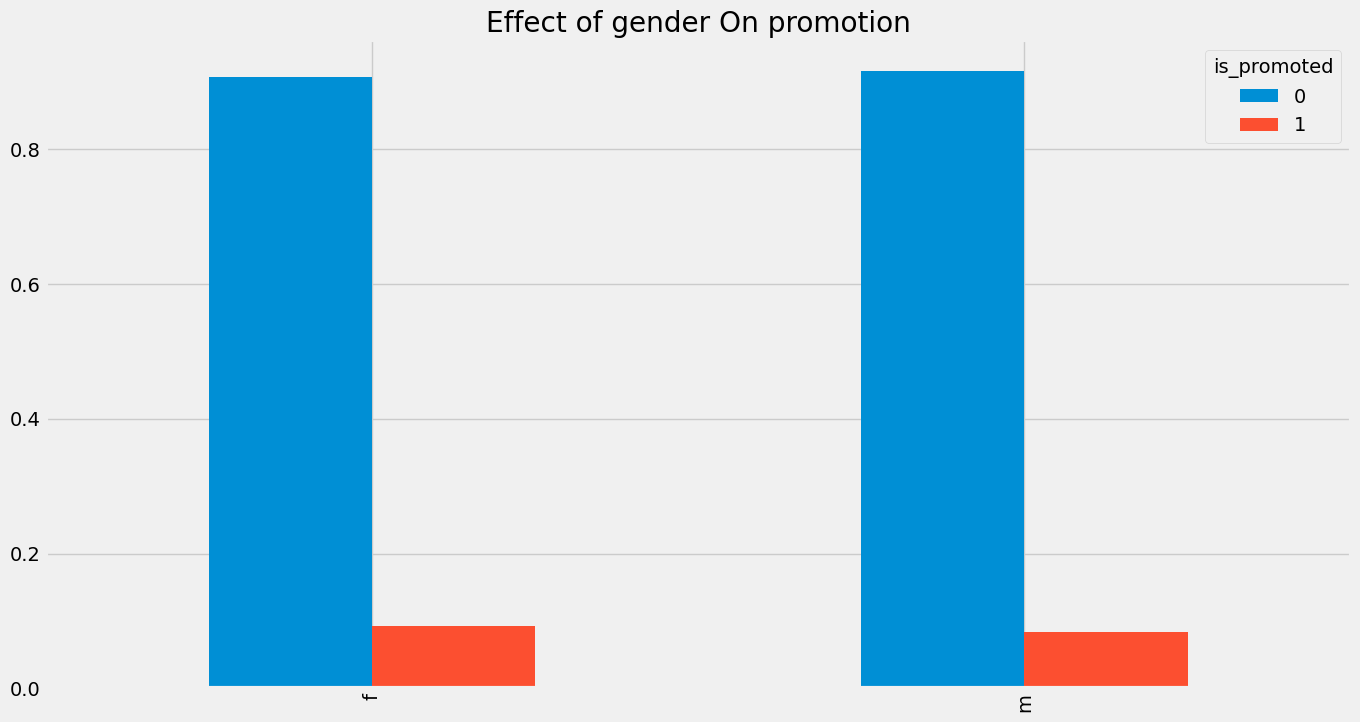

In [43]:
# Gender and Promption
x = pd.crosstab(train['gender'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title("Effect of gender On promotion")
plt.xlabel("")
plt.show()

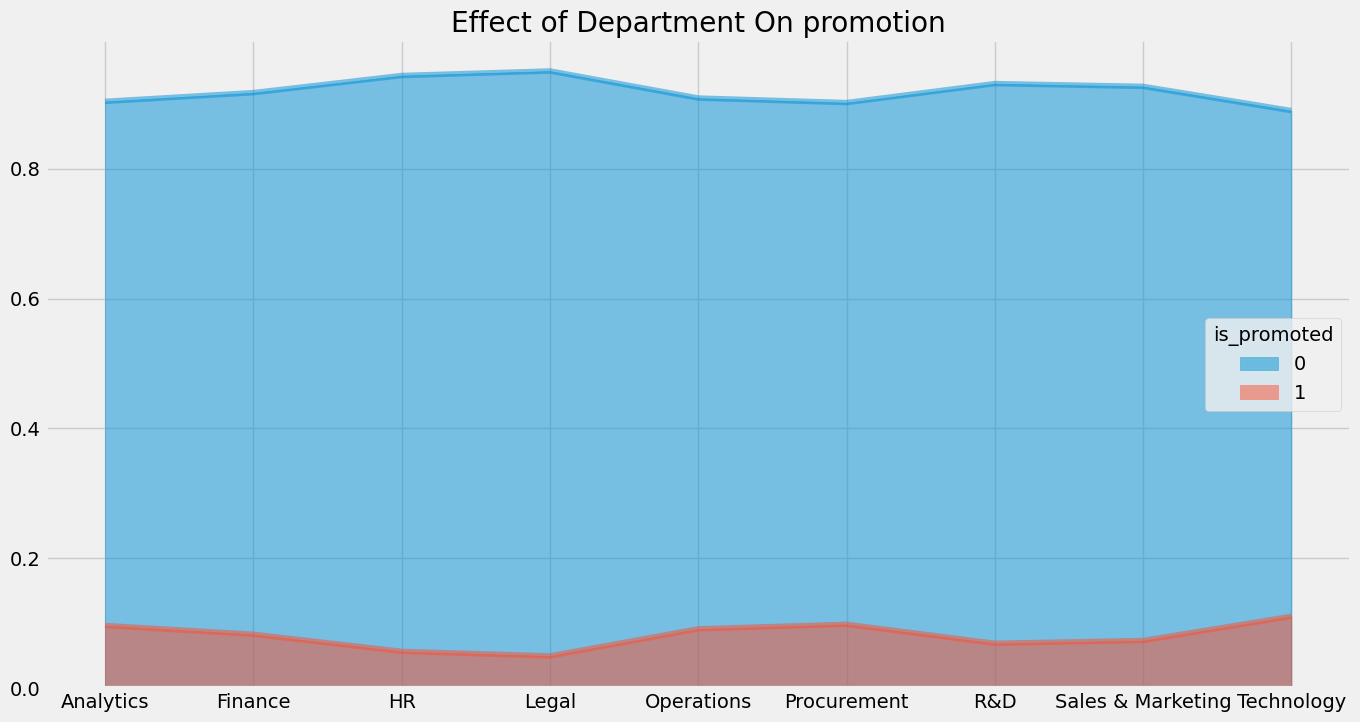

In [44]:
# Departmenet and promotion
x = pd.crosstab(train['department'], train['is_promoted'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title("Effect of Department On promotion")
plt.xlabel("")
plt.show()

C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is d

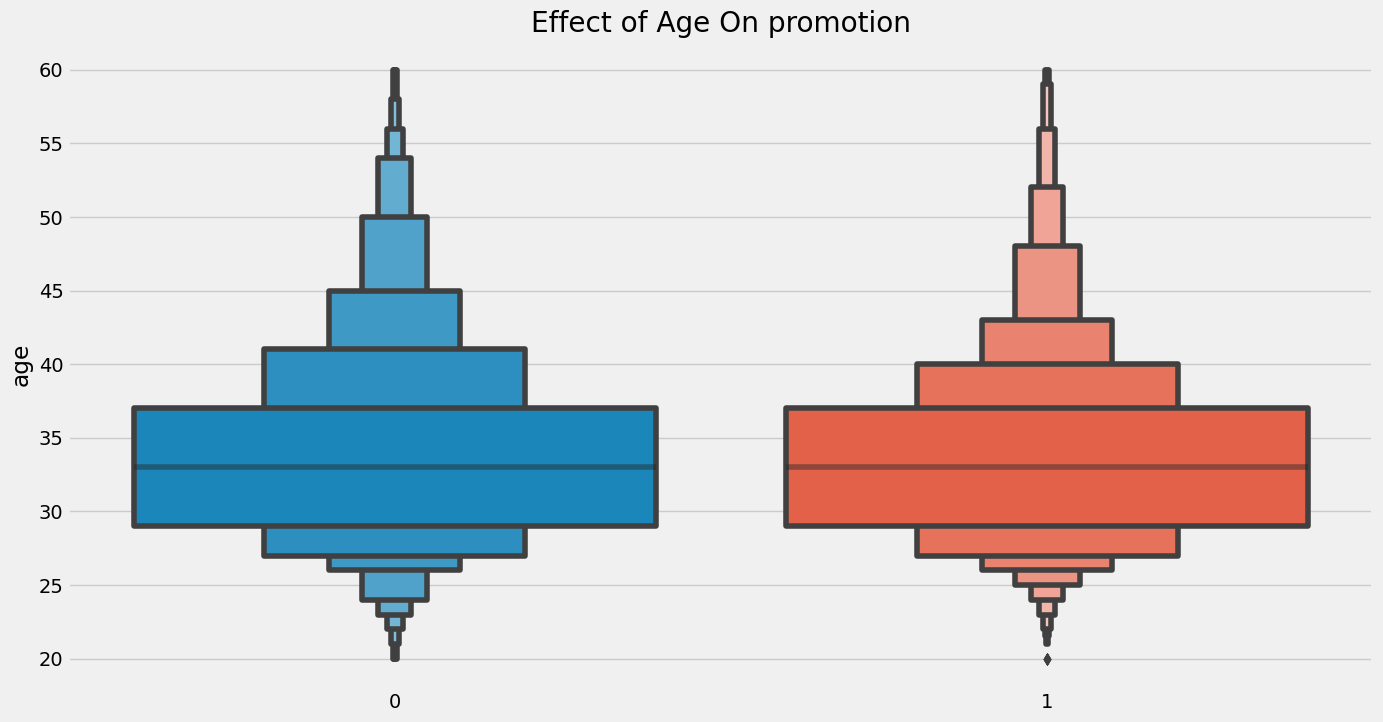

In [48]:
sns.boxenplot(data=train, x='is_promoted', y='age')
plt.title("Effect of Age On promotion")
plt.xlabel("")
plt.show()

### Multivariate Analysis

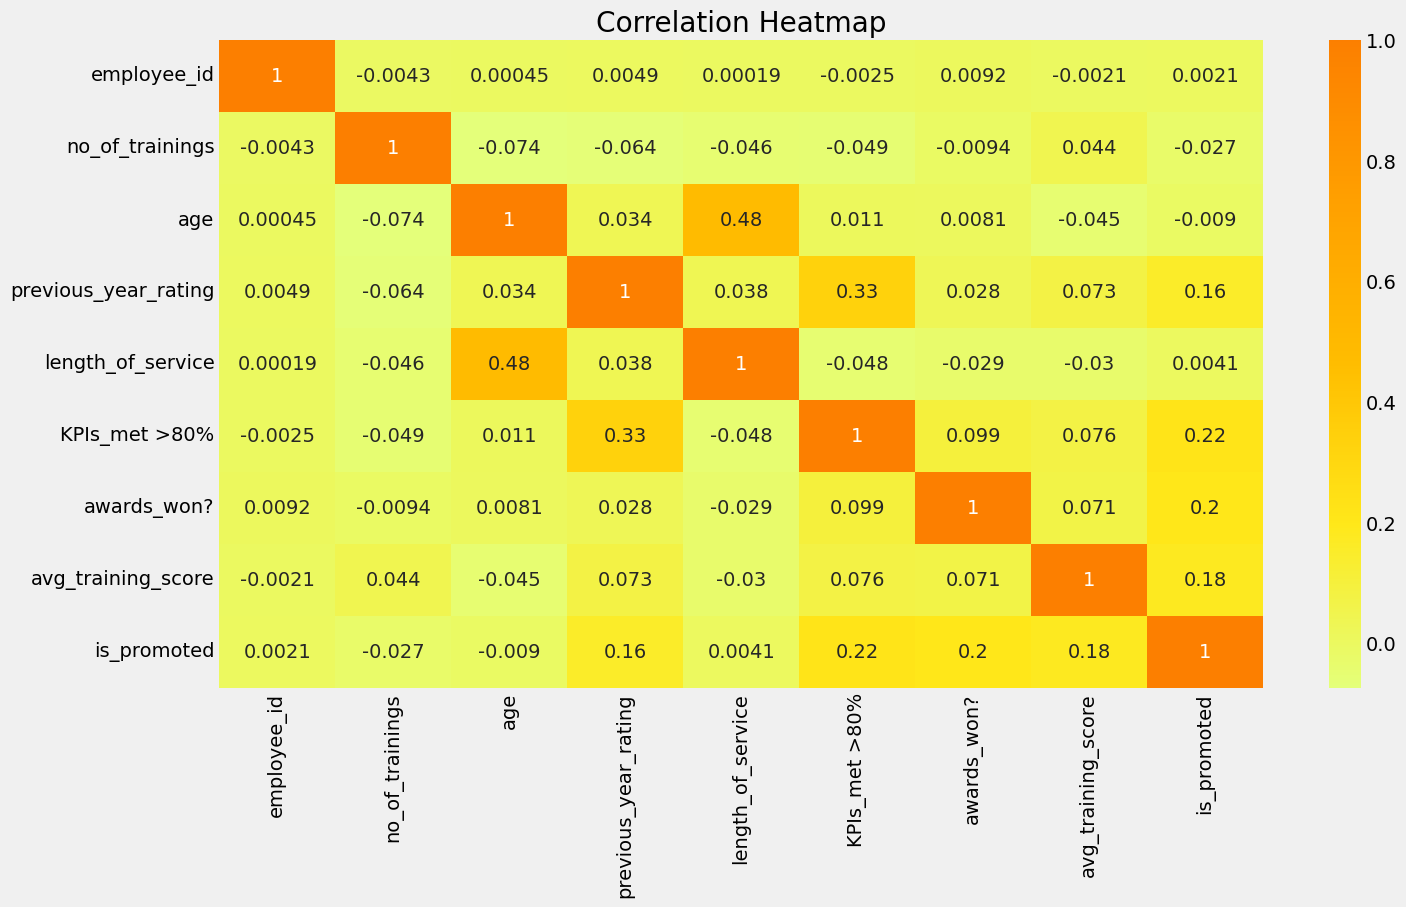

In [51]:
# multivariate Analysis
numeric_columns = train.select_dtypes(include=['number'])

# Create a correlation heatmap
sns.heatmap(numeric_columns.corr(), annot=True, cmap='Wistia')
plt.title("Correlation Heatmap")
plt.show()

In [52]:
train.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0


C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chokh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

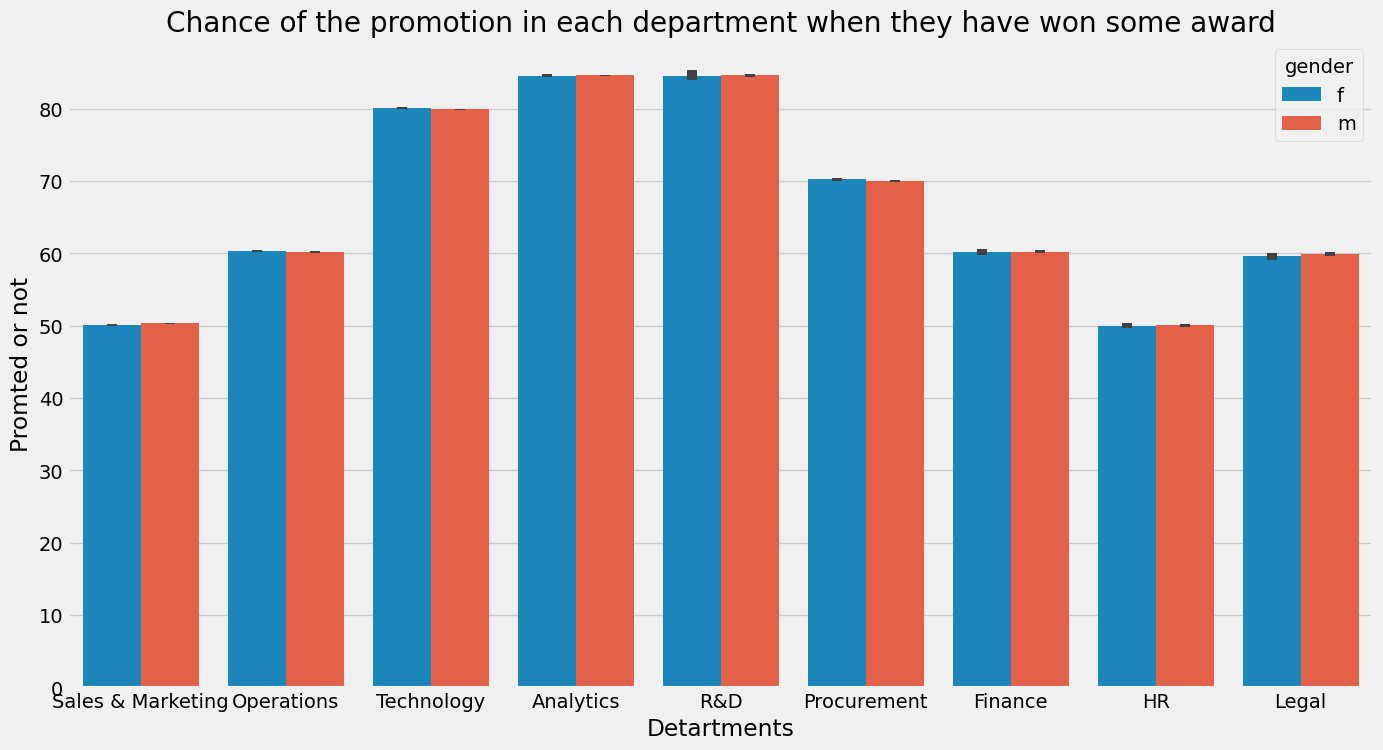

In [54]:
# Department columns and Award winner
sns.barplot(data=train, x='department', y='avg_training_score', hue='gender')
plt.title("Chance of the promotion in each department when they have won some award")
plt.xlabel("Detartments")
plt.ylabel("Promted or not")
plt.show()

In [55]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


### Feature engineering


In [56]:
# Create a metric of sum
train['sum_metric'] = train['awards_won?'] + train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?'] + test['KPIs_met >80%'] + test['previous_year_rating']

# Create a total score column
train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [57]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,6.0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,5.0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,3.0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,1.0,100
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,3.0,73


In [58]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'sum_metric', 'total_score'],
      dtype='object')

In [59]:
# Column Remove -> Unnecessary columns

train = train.drop(['employee_id', 'region', 'recruitment_channel'], axis = 1)
test = test.drop(['employee_id', 'region', 'recruitment_channel'], axis = 1)

print(train.columns)
print(test.columns)

Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted', 'sum_metric',
       'total_score'],
      dtype='object')
Index(['department', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'sum_metric', 'total_score'],
      dtype='object')


In [60]:
# no award winner, No KPIs_met >80%, previous year rating = 1, avg_training score < 60

train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
     (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
31860,Sales & Marketing,Bachelor's,m,1,27,1.0,2,0,0,58,1,1.0,58
51374,Sales & Marketing,Bachelor's,m,1,31,1.0,5,0,0,58,1,1.0,58


In [61]:
train.shape

(50632, 13)

In [62]:
train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)

In [63]:
train.shape

(50630, 13)

In [64]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,1,0,49,0,6.0,49
1,Operations,Bachelor's,m,1,30,5.0,4,0,0,60,0,5.0,60
2,Sales & Marketing,Bachelor's,m,1,34,3.0,7,0,0,50,0,3.0,50
3,Sales & Marketing,Bachelor's,m,2,39,1.0,10,0,0,50,0,1.0,100
4,Technology,Bachelor's,m,1,45,3.0,2,0,0,73,0,3.0,73


In [65]:
train.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


In [66]:
train['education'].value_counts()

education
Bachelor's          36963
Master's & above    12862
Below Secondary       805
Name: count, dtype: int64

In [67]:
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le = LabelEncoder()

In [70]:
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])

train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

In [71]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


In [72]:
# Splitting the data
y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test

In [73]:
x.shape

(50630, 12)

In [74]:
y.shape

(50630,)

In [75]:
x_test.shape

(23490, 12)

In [76]:
# handling Imblanced data

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(x,y)

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [78]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)

(74003, 12)
(74003,)
(18501, 12)
(18501,)
(23490, 12)


In [79]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)
x_test = sc.transform(x_test)

In [80]:
# Model Building

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

In [84]:
print("Training Acc.: ", model.score(x_train, y_train))
print("Testing Acc.: ", model.score(x_valid, y_valid))

Training Acc.:  0.9898923016634461
Testing Acc.:  0.6589373547375817


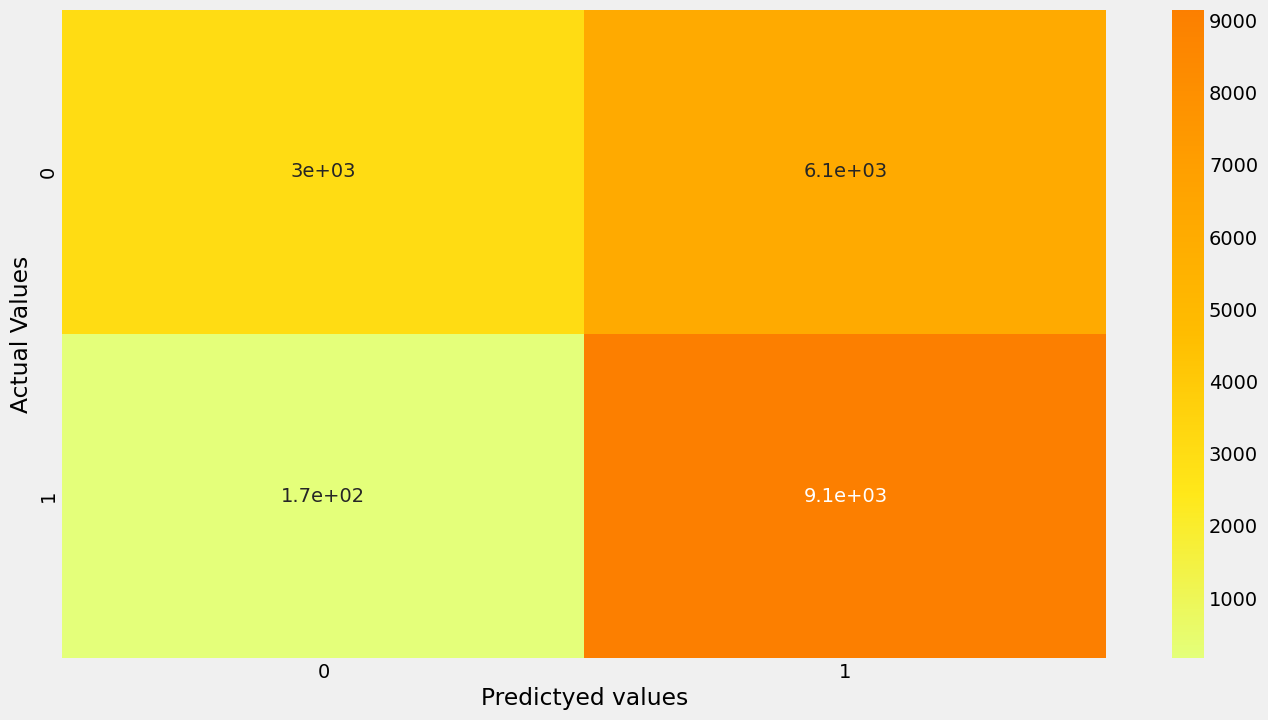

In [85]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.xlabel("Predictyed values")
plt.ylabel("Actual Values")
plt.show()

In [86]:
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.33      0.49      9187
           1       0.60      0.98      0.74      9314

    accuracy                           0.66     18501
   macro avg       0.77      0.66      0.62     18501
weighted avg       0.77      0.66      0.62     18501



In [87]:
train.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
0,7,3,0,1,35,5.0,8,1,0,49,0,6.0,49
1,4,2,1,1,30,5.0,4,0,0,60,0,5.0,60
2,7,2,1,1,34,3.0,7,0,0,50,0,3.0,50
3,7,2,1,2,39,1.0,10,0,0,50,0,1.0,100
4,8,2,1,1,45,3.0,2,0,0,73,0,3.0,73


In [88]:
prediction = model.predict(np.array([[2,
                                    3,
                                    1,
                                    1,
                                    30,
                                    5,
                                    10, 
                                    1,
                                    1,
                                    95,
                                    7,
                                    700]]))

print(" Whether the employee should get promoted or not", prediction)

 Whether the employee should get promoted or not [0]
